<a href="https://colab.research.google.com/github/akinniyi-opeyemi/Stats-507-Project-Submission/blob/main/Stats507_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This work is carrid out by Opeyemi Akinniyi**

In [55]:
!pip install fsspec==2024.9.0
!pip install datasets transformers
from datasets import load_dataset
import pandas as pd
import logging
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)


In [56]:
dataset = load_dataset("lazylegere/Global_Data_on_Sustainable_Energy")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'CPI 2020', 'CPI 2015', 'Financial flows to developing countries (US $) in constant 2020', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
        num_rows: 65712
    })
})


In [57]:
print(dataset.keys())
print(dataset['train'][0:5])

dict_keys(['train'])
{'Entity': ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan'], 'Year': [2000.0, 2001.0, 2002.0, 2003.0, 2004.0], 'Access to electricity (% of population)': [1.613591, 4.074574, 9.409158, 14.738506, 20.064968], 'Access to clean fuels for cooking': [6.2, 7.2, 8.2, 9.5, 10.9], 'Renewable-electricity-generating-capacity-per-capita': [9.22, 8.86, 8.47, 8.09, 7.75], 'Financial flows to developing countries (US $)': [20000.0, 130000.0, 3950000.0, 25970000.0, None], 'CPI 2020': [267.193, 267.193, 267.193, 267.193, 267.193], 'CPI 2015': [232.914, 232.914, 232.914, 232.914, 232.914], 'Financial flows to developing countries (US $) in constant 2020': [22943.48987, 149132.6842, 4531339.25, 29792121.6, 0.0], 'Renewable energy share in the total final energy consumption (%)': [44.99, 45.6, 37.83, 36.66, 44.24], 'Electricity from fossil fuels (TWh)': [0.16, 0.09, 0.13, 0.31, 0.33], 'Electricity from nuclear (TWh)': [0.0, 0.0, 0.0, 0.0, 0.0], 'Electricity 

In [58]:

df = pd.DataFrame(dataset['train'])
drop_this_columns = ['Access to clean fuels for cooking','CPI 2020', 'CPI 2015', 'Density\\n(P/Km2)']
df.drop(drop_this_columns, axis=1, inplace=True)
df.rename(columns={'Entity':'Country', 'Value_co2_emissions_kt_by_country':'Country CO2 Emissions' }, inplace=True)
df = df[df['Year']>= 2010.0].reset_index(drop=True)
df.head()

,Country,Year,Access to electricity (% of population),Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Financial flows to developing countries (US $) in constant 2020,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Country CO2 Emissions,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2010.0,42.70000,8.27,36500000.0,4.187187e+07,15.15,0.19,0.0,0.75,79.787230,1182.8920,2.46,7110.000134,NaN,14.362441,543.306526,652230.0,33.93911,67.709953
1,Afghanistan,2011.0,43.22202,8.13,28690000.0,3.291244e+07,12.61,0.18,0.0,0.60,76.923090,1436.1143,3.23,8930.000305,NaN,0.426355,591.190030,652230.0,33.93911,67.709953
2,Afghanistan,2012.0,69.10000,9.29,62630000.0,7.184754e+07,15.36,0.14,0.0,0.74,84.090910,1324.1211,2.61,8079.999924,NaN,12.752287,638.845852,652230.0,33.93911,67.709953
3,Afghanistan,2013.0,68.29065,9.10,268460000.0,3.079705e+08,16.86,0.22,0.0,0.89,80.180176,1060.7926,2.46,5989.999771,NaN,5.600745,624.315454,652230.0,33.93911,67.709953
4,Afghanistan,2014.0,89.50000,8.95,6940000.0,7.961391e+06,18.93,0.16,0.0,1.00,86.206900,868.5762,2.25,4880.000114,NaN,2.724543,614.223342,652230.0,33.93911,67.709953


In [59]:
from sklearn.preprocessing import LabelEncoder

df.fillna(0, inplace=True)
if 'Country' in df.columns:
    df = df[df['Country'].apply(lambda x: isinstance(x, str))]
encoder = LabelEncoder()
df['country_code'] = encoder.fit_transform(df['Country'])
y = target = df['Country CO2 Emissions']
X = features = df.drop(columns = ['Country','Country CO2 Emissions'])
y.head()
#X.head()

,Country CO2 Emissions
0,7110.000134
1,8930.000305
2,8079.999924
3,5989.999771
4,4880.000114


In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
# Convert the Pandas Series to a NumPy array before reshaping
y = y.to_numpy().reshape(-1, 1)
X_normalised = scaler.fit_transform(X)
print(y)
print(X_normalised)
scaler = MinMaxScaler()
y = y.reshape(-1,1)
X_normalised = scaler.fit_transform(X)
print(y)
print(X_normalised)

[[ 7110.000134]
 [ 8930.000305]
 [ 8079.999924]
 ...
 [11760.00023 ]
 [    0.      ]
 [    0.      ]]
[[0.         0.427      0.00270245 ... 0.70694423 0.68761236 0.        ]
 [0.09090909 0.4322202  0.0026567  ... 0.70694423 0.68761236 0.        ]
 [0.18181818 0.691      0.00303576 ... 0.70694423 0.68761236 0.        ]
 ...
 [0.81818182 0.46781475 0.02659966 ... 0.20672939 0.57847253 1.        ]
 [0.90909091 0.5274767  0.0263415  ... 0.20672939 0.57847253 1.        ]
 [1.         0.         0.         ... 0.38635144 0.49594242 1.        ]]
[[ 7110.000134]
 [ 8930.000305]
 [ 8079.999924]
 ...
 [11760.00023 ]
 [    0.      ]
 [    0.      ]]
[[0.         0.427      0.00270245 ... 0.70694423 0.68761236 0.        ]
 [0.09090909 0.4322202  0.0026567  ... 0.70694423 0.68761236 0.        ]
 [0.18181818 0.691      0.00303576 ... 0.70694423 0.68761236 0.        ]
 ...
 [0.81818182 0.46781475 0.02659966 ... 0.20672939 0.57847253 1.        ]
 [0.90909091 0.5274767  0.0263415  ... 0.20672939 0.578

In [61]:
#Splitting to test and train and fitting machine Learning model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.2, random_state=42)

In [62]:
#performing simple linear regression for observation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import time

start_time = time.perf_counter()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse= np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (MSE):", linear_mse)
print("RMSE: ", linear_rmse)
print("R² Score:", linear_r2)

linear_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", linear_regression_scores)
print("Mean R² score:", linear_regression_scores.mean())
T1 = time.perf_counter() - start_time
print('model time in seconds: ', T1)

Mean Squared Error (MSE): 32095733467.330135
RMSE:  179152.82154442932
R² Score: 0.9608763658295987
Cross-validated R² scores: [ 0.89769647  0.92283778  0.85954337  0.85984351 -2.35441554]
Mean R² score: 0.23710111729197864
model time in seconds:  0.14198967899937998


In [63]:
from sklearn.linear_model import Lasso
start_time = time.perf_counter()
model = Lasso(alpha=100)
model.fit(X_train, y_train)
y_pred_lasso = model.predict(X_test)

lasso_mse = mean_squared_error(y_test,y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error (MSE):", lasso_mse)
print("RMSE: ", lasso_rmse)
print("R² Score:", lasso_r2)

lasso_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", lasso_regression_scores)
print("Mean R² score:", lasso_regression_scores.mean())
T2 = time.perf_counter() - start_time
print('model time in seconds: ', T2)

Mean Squared Error (MSE): 32173931466.93727
RMSE:  179370.93261433768
R² Score: 0.9607810450626624
Cross-validated R² scores: [ 0.89773868  0.92332957  0.8786622   0.86185799 -2.30293698]
Mean R² score: 0.2517302926934072
model time in seconds:  0.07533215100011148


In [64]:
from sklearn.linear_model import LassoCV
start_time = time.perf_counter()
model = LassoCV(alphas=[0.1, 1, 10, 100, 1000, 10000, 100000], cv=5, random_state=42)
model.fit(X_train, y_train)

print("best alpha from CV: ", model.alpha_)
y_pred_lasso_cv = model.predict(X_test)

lasso_cv_mse = mean_squared_error(y_test, y_pred_lasso_cv)
lasso_cv_rmse= np.sqrt(lasso_cv_mse)
lasso_cv_r2 = r2_score(y_test, y_pred_lasso_cv)

print("Mean Squared Error (MSE):", lasso_cv_mse)
print("RMSE: ", lasso_cv_rmse)
print("R² Score:", lasso_cv_r2)

lasso_cv_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", lasso_cv_regression_scores)
print("Mean R² score:", lasso_cv_regression_scores.mean())
T3 = time.perf_counter() - start_time
print('model time in seconds: ', T3)

best alpha from CV:  1000.0
Mean Squared Error (MSE): 40505545331.12529
RMSE:  201259.89498935273
R² Score: 0.9506250842025272


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was e

Cross-validated R² scores: [ 0.89272869  0.91536816  0.95397909  0.87256801 -2.34808603]
Mean R² score: 0.25731158355328543
model time in seconds:  0.327898493000248


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


This is a bad RMSE Cross Validation Score. Therefore, there is need to optimise or use better models. Other models selected for exploration are random forest regressors, XGBoost.

In [65]:
#1. Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

start_time = time.perf_counter()
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred_rfr = model.predict(X_test)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, y_pred_rfr)
rfr_rmse = np.sqrt(rfr_mse)
rfr_r2 = r2_score(y_test, y_pred_rfr)

print("Mean Squared Error (MSE):", rfr_mse)
print("R² Score:", rfr_r2)
print("RMSE:", rfr_rmse)

random_forest_regression_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", random_forest_regression_scores)
print("Mean R² score:", random_forest_regression_scores.mean())
T4 = time.perf_counter() - start_time
print('model time in seconds: ', T4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 5601661920.256825
R² Score: 0.9931717599805758
RMSE: 74844.25108354566


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [ 0.97916242  0.97839129  0.99255832  0.87387465 -1.02543698]
Mean R² score: 0.5597099404920736
model time in seconds:  12.85771752799883


Bad Score. Although some folds give a good RMSE, the one with a negative value suggests there could be a problem with the dataset. Possibly, there is huge variation in the relation of certain features to the target. To reduce the variation, there is need to ensure only releant features are used.

Year: 0.002625706292426929
Access to electricity (% of population): 0.0015479875203447332
Renewable-electricity-generating-capacity-per-capita: 0.005037519923295547
Financial flows to developing countries (US $): 0.012814051148108399
Financial flows to developing countries (US $) in constant 2020: 0.012560153058346884
Renewable energy share in the total final energy consumption (%): 0.015988407446841654
Electricity from fossil fuels (TWh): 0.8477562210619481
Electricity from nuclear (TWh): 0.009590382858621507
Electricity from renewables (TWh): 0.0034954071208005474
Low-carbon electricity (% electricity): 0.0032814027948774457
Primary energy consumption per capita (kWh/person): 0.012970095273767643
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 0.01594590331748076
Renewables (% equivalent primary energy): 0.00252242130586552
gdp_growth: 0.022971872410103886
gdp_per_capita: 0.009697999155577482
Land Area(Km2): 0.008340116985946089
Latitude: 0.005437818846104869
Longitude: 

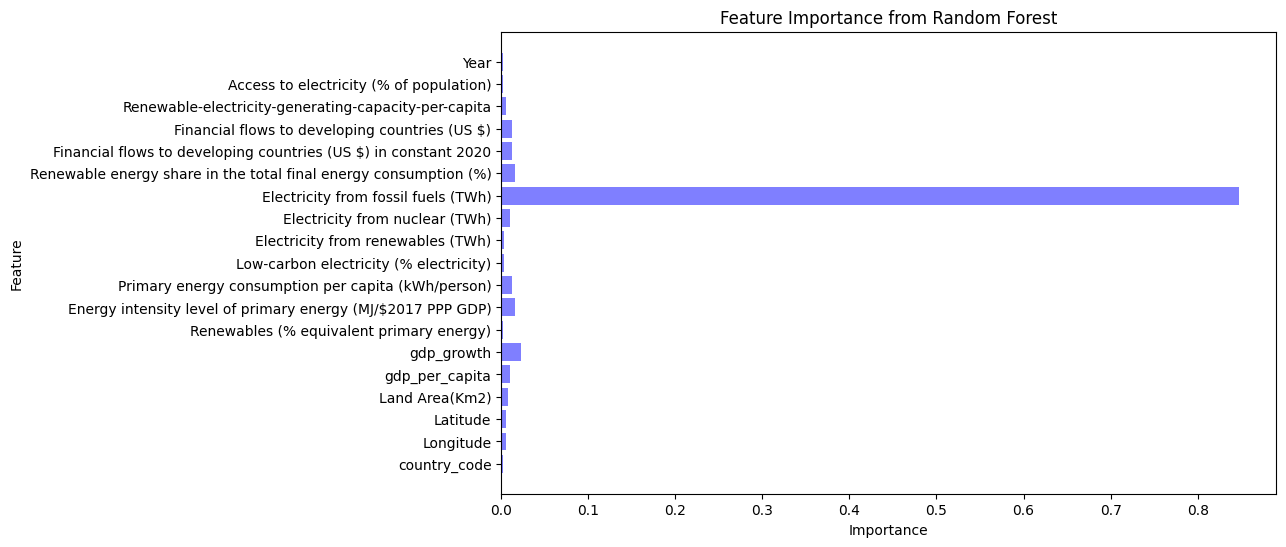

Retained Features: Index(['Financial flows to developing countries (US $)',
       'Financial flows to developing countries (US $) in constant 2020',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'gdp_growth'],
      dtype='object')
model time in seconds:  0.5925248509993253


In [66]:
import matplotlib.pyplot as plt
start_time = time.perf_counter()
original_feature_names = X.columns
feature_importance = model.feature_importances_
for feature_name, importance in zip(original_feature_names, feature_importance):
    print(f"{feature_name}: {importance}")

importance_df = pd.DataFrame({
    'Feature': original_feature_names,
    'Importance': feature_importance
})

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=(0, 0, 1, 0.5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

importance_threshold = 1/100
important_feature_indices = [i for i, importance in enumerate(feature_importance) if importance > importance_threshold]
X_train_filtered = X_train[:, important_feature_indices]
X_test_filtered = X_test[:, important_feature_indices]
print(f"Retained Features: {original_feature_names[important_feature_indices]}")
print('model time in seconds: ',time.perf_counter() - start_time)

Features like years, Access to electricity, and Renewable energy have lower importance to the target. These features can be excluded for a btter represenation of the feature influence on the targeted output. In this analysis, importance values \lt 1% is excluded.

In [67]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.perf_counter()
model = RandomForestRegressor(random_state=42)
model.fit(X_train_filtered, y_train)
y_pred_rfr_imp = model.predict(X_test_filtered)
rfr_imp_r2 = r2_score(y_test, y_pred_rfr_imp)
print("MSE:", mean_squared_error(y_test, y_pred_rfr_imp))
print("R² Score:", r2_score(y_test, y_pred_rfr_imp))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_rfr_imp)))
scores = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
T5 = time.perf_counter() - start_time
print('model time in seconds: ', T5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 4422211722.305567
R² Score: 0.9946094706380942
RMSE: 66499.71219716343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [ 0.97596436  0.98744701  0.99028692  0.93320228 -0.21652509]
Mean R² score: 0.7340750954021205
model time in seconds:  6.226814835999903


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

run_search = False
if run_search:
  start_time = time.perf_counter()
  # Define hyperparameter grid
  param_grid = {
      'n_estimators': [100, 200, 300],
      'max_depth': [10, 15, 20, None],
      'max_features': ['sqrt', 'log2', None],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4]
  }

  # Initialize Random Forest
  model = RandomForestRegressor(random_state=42)

  # GridSearchCV
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
  grid_search.fit(X_train_filtered, y_train)

  # Best parameters and score
  print("Best Parameters:", grid_search.best_params_)
  print("Best Cross-Validated R²:", grid_search.best_score_)
  print('Grid search for random forest regressor in seconds: ',time.perf_counter() - start_time)

'''
  This code took 1683 seconds, as a result it is made passive
  Results from grid search:
  Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, random_state = 42}
  Best Cross-Validated R²: 0.8538199421025897
  Grid search time for random forest regressor in seconds: 1683.1201328680004
'''

"\n  This code took 1683 seconds, as a result it is made passive\n  Results from grid search:\n  Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, random_state = 42}\n  Best Cross-Validated R²: 0.8538199421025897\n  Grid search time for random forest regressor in seconds: 1683.1201328680004\n"

In [69]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.perf_counter()

# Train the optimized model with the best parameters
optimized_model = RandomForestRegressor(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

optimized_model.fit(X_train_filtered, y_train.ravel())  # Use .ravel() to avoid the column-vector warning

# Evaluate on the test set

y_pred_rfr_imp_opt = optimized_model.predict(X_test_filtered)
rfr_opt_r2 = r2_score(y_test, y_pred_rfr_imp_opt)
rfr_opt_mse = mean_squared_error(y_test, y_pred_rfr_imp_opt)
rfr_opt_rmse = sqrt(rfr_opt_mse)
print("Test R²:", rfr_opt_r2)
print("Test MSE:", rfr_opt_mse)
print("Test RMSE:", rfr_opt_rmse)
scores = cross_val_score(optimized_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
T6 = time.perf_counter() - start_time
print('model time in seconds: ', T6)

Test R²: 0.9097664156203378
Test MSE: 74024643555.28899
Test RMSE: 272074.7021596991


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validated R² scores: [0.90084215 0.91305237 0.95696868 0.87982623 0.61841028]
Mean R² score: 0.8538199421025897
model time in seconds:  8.201535848000276


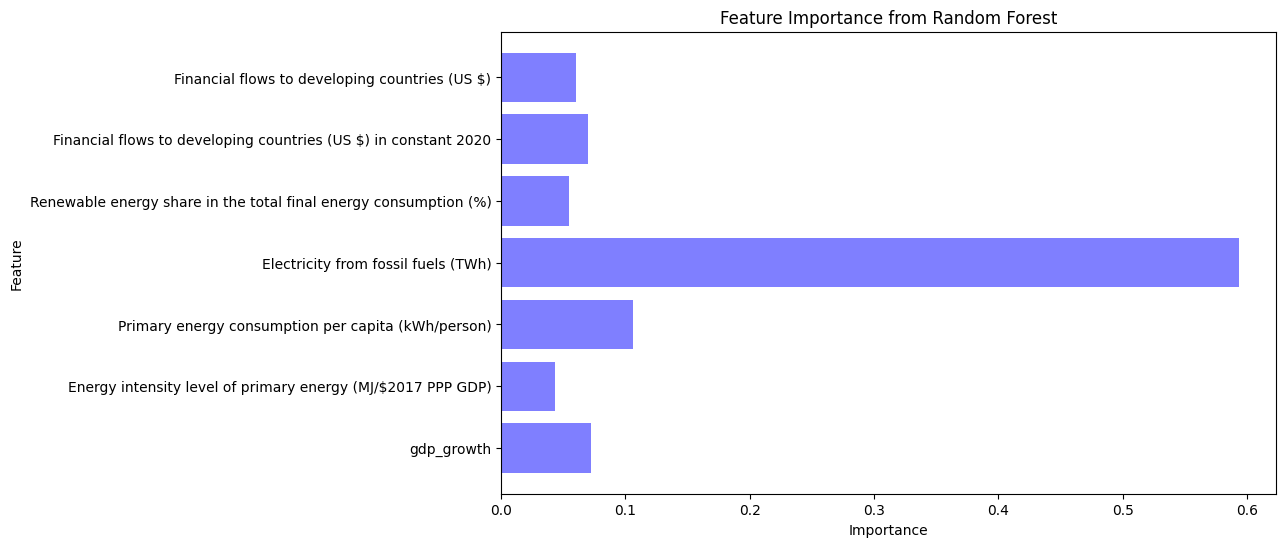

In [70]:
new_feature_names = original_feature_names[important_feature_indices]
feature_importance = optimized_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': new_feature_names,
    'Importance': feature_importance
})

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=(0, 0, 1, 0.5))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [71]:
print("Target Mean:", y_test.mean())
print("Target Std Dev:", y_test.std())

Target Mean: 144790.0930267119
Target Std Dev: 905741.0634877307


In [72]:
from xgboost import XGBRegressor
start_time = time.perf_counter()

xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_filtered, y_train.ravel())

y_pred_xgb = xgb_model.predict(X_test_filtered)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = sqrt(xgb_mse)
print("Test R²:", xgb_r2)
print("XGBoost Test MSE:",xgb_mse)
print("XGBoost Test RMSE:",xgb_rmse)
scores = cross_val_score(xgb_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
T7 = time.perf_counter() - start_time
print('model time in seconds: ', T7)


Test R²: 0.9972062036095086
XGBoost Test MSE: 2291938011.7054048
XGBoost Test RMSE: 47874.189410426625
Cross-validated R² scores: [0.98643047 0.98950627 0.99340523 0.99726171 0.71931115]
Mean R² score: 0.9371829654587049
model time in seconds:  1.7831701209997846


In [73]:
!pip install optuna
import optuna
from xgboost import XGBRegressor

run_search = False
if run_search:
  start_time = time.perf_counter()

  def objective(trial):
      # Suggest parameter values
      param = {
          'n_estimators': trial.suggest_int('n_estimators', 100, 500),
          'max_depth': trial.suggest_int('max_depth', 3, 10),
          'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
          'subsample': trial.suggest_float('subsample', 0.6, 1.0),
          'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
      }

      model = XGBRegressor(random_state=42, **param)
      score = cross_val_score(model, X_train_filtered, y_train, cv=5, scoring='neg_mean_squared_error')
      return -score.mean()

  # Run optimization
  study = optuna.create_study(direction='minimize')
  study.optimize(objective, n_trials=50)
  print("Best Parameters:", study.best_trial.params)
  print('model time in seconds: ',time.perf_counter() - start_time)

'''
This code took 1683 seconds, as a result it is made passive.
Best Parameters: {'n_estimators': 469, 'max_depth': 3, 'learning_rate': 0.09270888408895496, 'subsample': 0.9730478771951506, 'colsample_bytree': 0.9558419585611917}
model time in seconds:  138.11460464099946
'''

"\nThis code took 1683 seconds, as a result it is made passive.\nBest Parameters: {'n_estimators': 469, 'max_depth': 3, 'learning_rate': 0.09270888408895496, 'subsample': 0.9730478771951506, 'colsample_bytree': 0.9558419585611917}\nmodel time in seconds:  138.11460464099946\n"

In [74]:
from xgboost import XGBRegressor

start_time = time.perf_counter()

xgb_model = XGBRegressor(n_estimators=469, max_depth=3, learning_rate=0.09270888408895496, subsample= 0.9730478771951506, colsample_bytree=0.9558419585611917, random_state=42)
xgb_model.fit(X_train_filtered, y_train.ravel())

y_pred_xgb_opt = xgb_model.predict(X_test_filtered)
xgb_opt_mse = mean_squared_error(y_test, y_pred_xgb_opt)
xgb_opt_rmse = np.sqrt(xgb_opt_mse)
xgb_opt_r2 = r2_score(y_test, y_pred_xgb_opt)
print("XGBoost Optimsed model R²:", xgb_opt_r2)
print("XGBoost Optimsed model MSE:", xgb_opt_mse)
print("XGBoost Optimsed model RMSE:", xgb_opt_rmse)
scores = cross_val_score(xgb_model, X_train_filtered, y_train, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R² score:", scores.mean())
T8 = time.perf_counter() - start_time
print('model time in seconds: ', T8)

XGBoost Optimsed model R²: 0.9967198873085138
XGBoost Optimsed model MSE: 2690895795.3705525
XGBoost Optimsed model RMSE: 51873.84500276177
Cross-validated R² scores: [0.99391443 0.98971962 0.97856962 0.98378043 0.90792159]
Mean R² score: 0.9707811389626471
model time in seconds:  2.1599951530006365


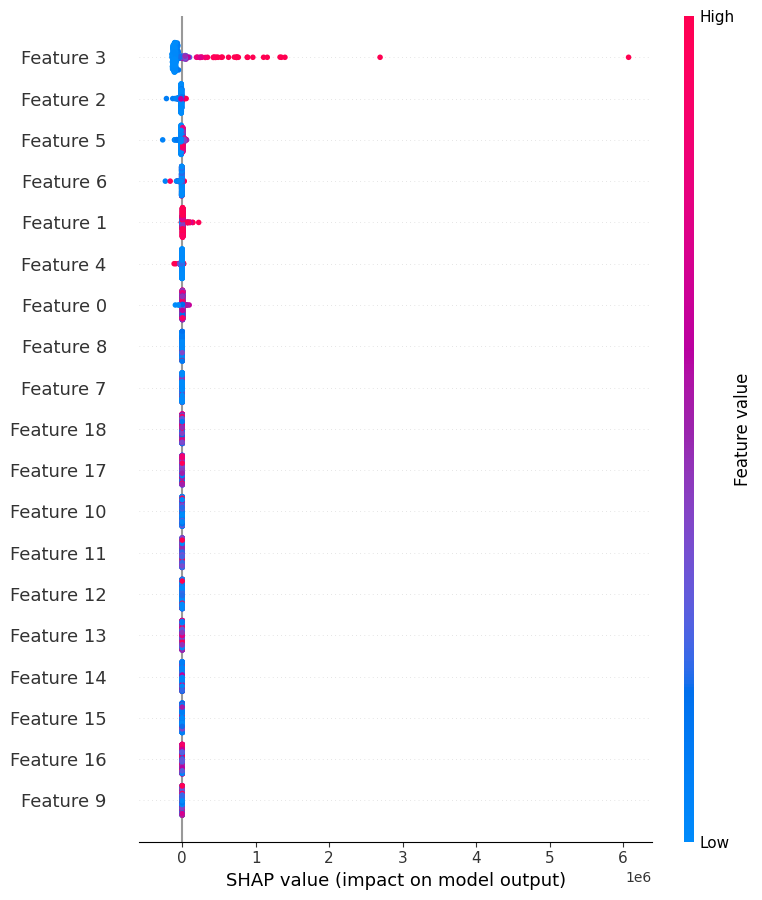

In [75]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

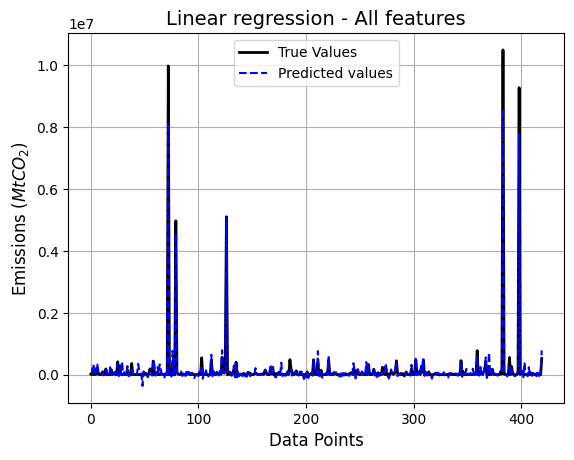

In [76]:
plt.plot(y_test, label="True Values", color='black', linewidth=2)
plt.plot(y_pred_linear, label="Predicted values", color='blue', linestyle='--')
plt.title("Linear regression - All features", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

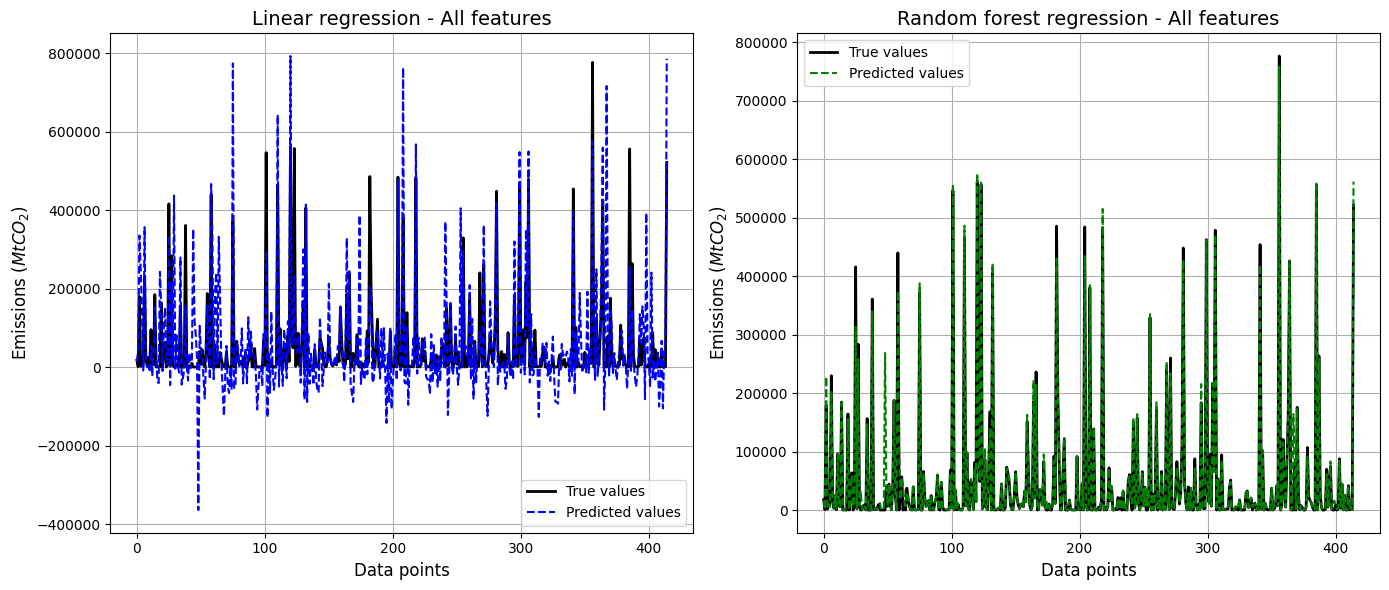

In [77]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

y_true = y_test
y_pred1 = y_pred_rfr
y_pred2 = y_pred_rfr_imp

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_linear[y_pred_linear<0.15*10**7], label="Predicted values", color='blue', linestyle='--')
plt.title("Linear regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr[y_pred_rfr<0.15*10**7], label="Predicted values", color='green', linestyle='--')
plt.title("Random forest regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


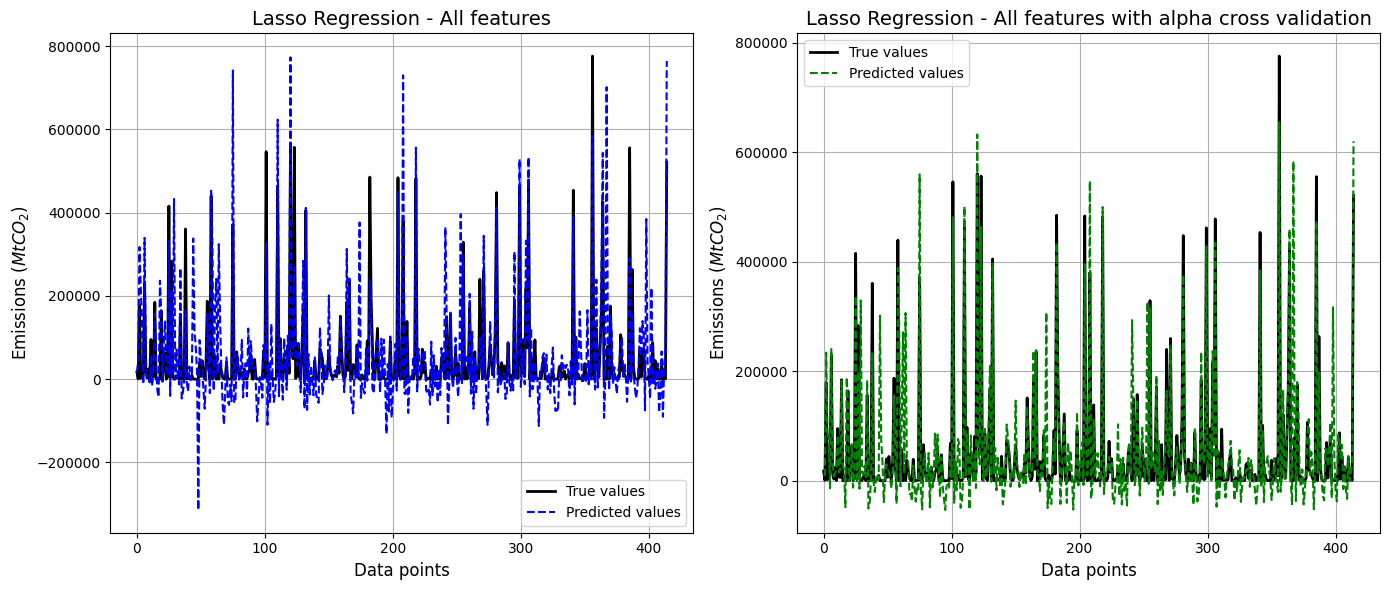

In [78]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_lasso[y_pred_lasso<0.15*10**7], label="Predicted values", color='blue', linestyle='--')
plt.title("Lasso Regression - All features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_lasso_cv[y_pred_lasso_cv<0.15*10**7], label="Predicted values", color='green', linestyle='--')
plt.title("Lasso Regression - All features with alpha cross validation", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


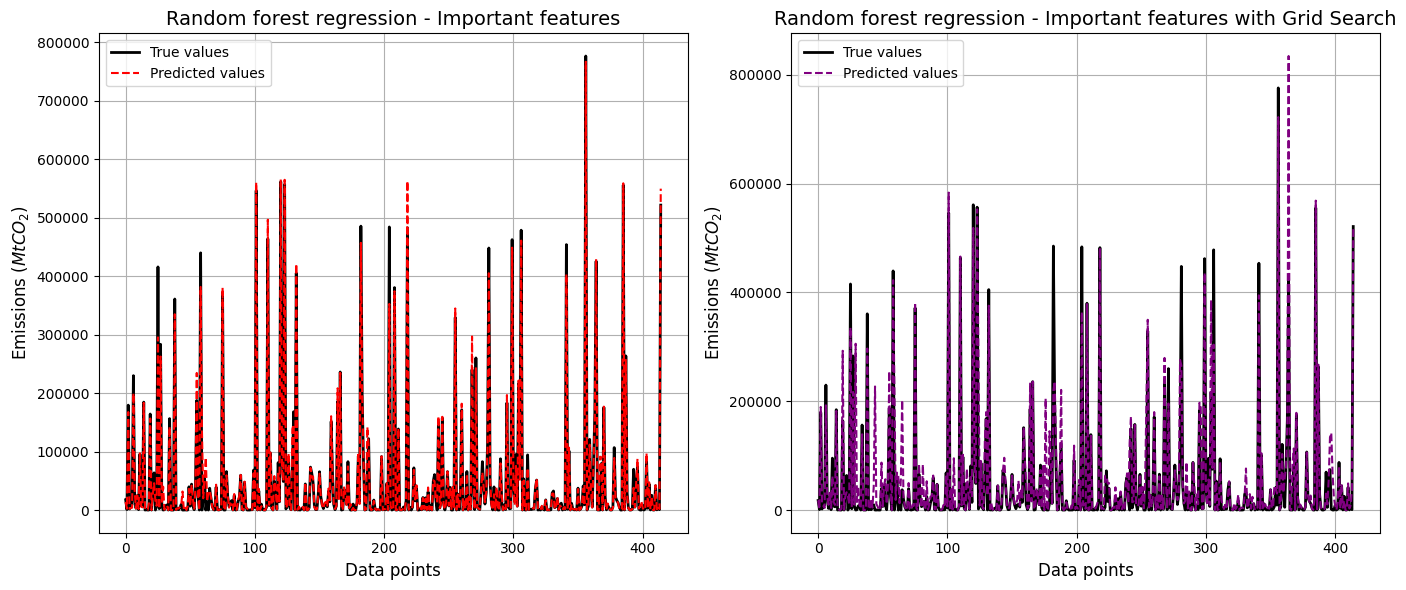

In [79]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr_imp[y_pred_rfr_imp<0.15*10**7], label="Predicted values", color='red', linestyle='--')
plt.title("Random forest regression - Important features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_rfr_imp_opt[y_pred_rfr_imp_opt<0.15*10**7], label="Predicted values", color='purple', linestyle='--')
plt.title("Random forest regression - Important features with Grid Search", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


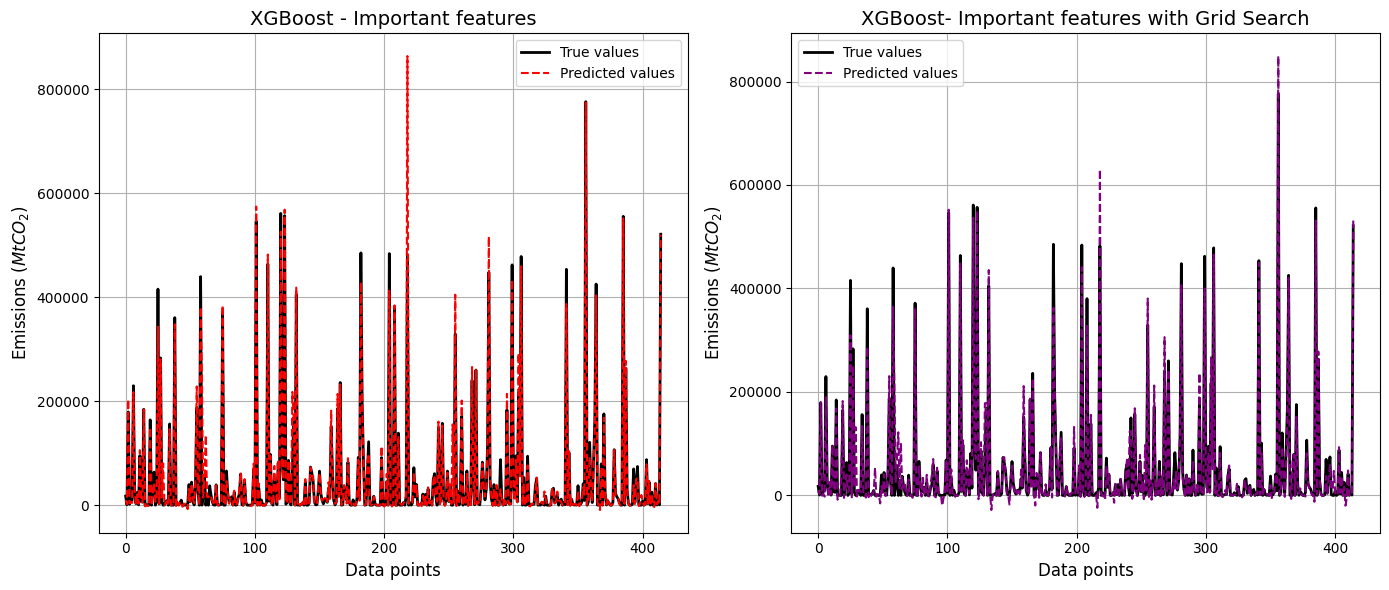

In [80]:
# Plotting side-by-side line charts using plt
plt.figure(figsize=(14, 6))

# First subplot for Model 1
plt.subplot(1, 2, 1)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_xgb[y_pred_xgb<0.15*10**7], label="Predicted values", color='red', linestyle='--')
plt.title("XGBoost - Important features", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Second subplot for Model 2
plt.subplot(1, 2, 2)
plt.plot(y_test[y_test <0.15*10**7], label="True values", color='black', linewidth=2)
plt.plot(y_pred_xgb_opt[y_pred_xgb_opt<0.15*10**7], label="Predicted values", color='purple', linestyle='--')
plt.title("XGBoost- Important features with Grid Search", fontsize=14)
plt.xlabel("Data points", fontsize=12)
plt.ylabel(r"Emissions $(MtCO_{2})$", fontsize=12)
#plt.ylim(0,0.15*10**7)
plt.legend(fontsize=10)
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [92]:
!pip install torch torchvision
import torch
import torch.nn as nn

Advanced Approaches: 1. Forward Neural Networks

Epoch [10/1000], Loss: 572604743680.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [20/1000], Loss: 572604612608.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [30/1000], Loss: 572604481536.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [40/1000], Loss: 572604088320.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [50/1000], Loss: 572603432960.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [60/1000], Loss: 572602122240.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [70/1000], Loss: 572599894016.0000, Train R²: -0.0324, Val R²: -0.0255
Epoch [80/1000], Loss: 572596355072.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [90/1000], Loss: 572590587904.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [100/1000], Loss: 572581937152.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [110/1000], Loss: 572569288704.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [120/1000], Loss: 572551659520.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [130/1000], Loss: 572527214592.0000, Train R²: -0.0322, Val R²: -0.

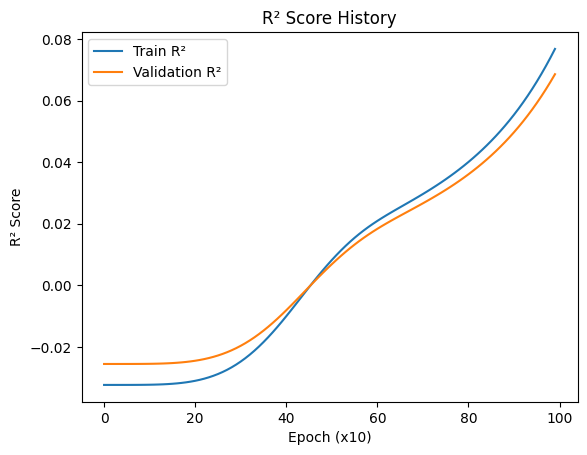

In [93]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 128)
        self.second_layer = nn.Linear(128, 64)
        self.third_layer = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.relu(self.second_layer(out))
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T9 = time.perf_counter() - start_time
print('model time in seconds: ', T9)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()


Epoch [10/1000], Loss: 572604743680.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [20/1000], Loss: 572604481536.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [30/1000], Loss: 572603826176.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [40/1000], Loss: 572601729024.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [50/1000], Loss: 572596224000.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [60/1000], Loss: 572583116800.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [70/1000], Loss: 572554543104.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [80/1000], Loss: 572496936960.0000, Train R²: -0.0322, Val R²: -0.0254
Epoch [90/1000], Loss: 572387950592.0000, Train R²: -0.0320, Val R²: -0.0252
Epoch [100/1000], Loss: 572193243136.0000, Train R²: -0.0316, Val R²: -0.0250
Epoch [110/1000], Loss: 571863597056.0000, Train R²: -0.0310, Val R²: -0.0245
Epoch [120/1000], Loss: 571332689920.0000, Train R²: -0.0301, Val R²: -0.0237
Epoch [130/1000], Loss: 570516635648.0000, Train R²: -0.0286, Val R²: -0.

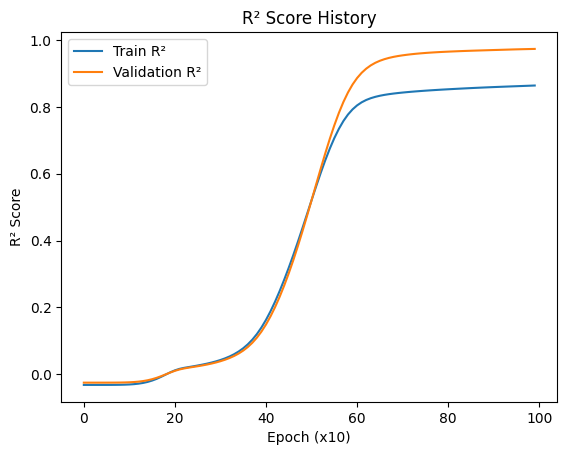

In [94]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 256)
        self.new_layer = nn.Linear(256, 128)
        self.second_layer = nn.Linear(128, 64)
        self.third_layer = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.relu(self.new_layer(out))
        out = self.relu(self.second_layer(out))
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T10 = time.perf_counter() - start_time
print('model time in seconds: ', T10)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()


Epoch [10/1000], Loss: 572589277184.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [20/1000], Loss: 572094087168.0000, Train R²: -0.0314, Val R²: -0.0246
Epoch [30/1000], Loss: 567209361408.0000, Train R²: -0.0226, Val R²: -0.0165
Epoch [40/1000], Loss: 548716314624.0000, Train R²: 0.0107, Val R²: 0.0118
Epoch [50/1000], Loss: 541398171648.0000, Train R²: 0.0239, Val R²: 0.0244
Epoch [60/1000], Loss: 531532152832.0000, Train R²: 0.0417, Val R²: 0.0395
Epoch [70/1000], Loss: 506474954752.0000, Train R²: 0.0869, Val R²: 0.0853
Epoch [80/1000], Loss: 437845327872.0000, Train R²: 0.2106, Val R²: 0.2089
Epoch [90/1000], Loss: 303679766528.0000, Train R²: 0.4525, Val R²: 0.4763
Epoch [100/1000], Loss: 171925897216.0000, Train R²: 0.6900, Val R²: 0.7930
Epoch [110/1000], Loss: 118219235328.0000, Train R²: 0.7869, Val R²: 0.9179
Epoch [120/1000], Loss: 102532612096.0000, Train R²: 0.8151, Val R²: 0.9520
Epoch [130/1000], Loss: 95322759168.0000, Train R²: 0.8281, Val R²: 0.9551
Epoch [140/1000]

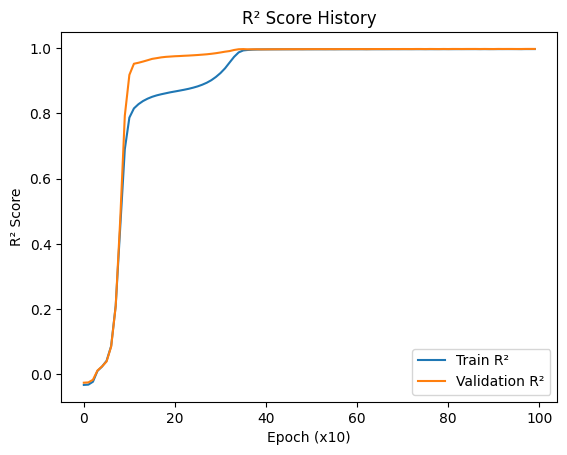

In [95]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 256)
        self.new_layer = nn.Linear(256, 128)
        self.second_layer = nn.Linear(128, 64)
        self.third_layer = nn.Linear(64, 32)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.relu(self.new_layer(out))
        out = self.relu(self.second_layer(out))
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T11 = time.perf_counter() - start_time
print('model time in seconds: ', T11)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()


Epoch [10/1000], Loss: 572604743680.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [20/1000], Loss: 572604547072.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [30/1000], Loss: 572604350464.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [40/1000], Loss: 572603760640.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [50/1000], Loss: 572602580992.0000, Train R²: -0.0324, Val R²: -0.0256
Epoch [60/1000], Loss: 572600352768.0000, Train R²: -0.0324, Val R²: -0.0255
Epoch [70/1000], Loss: 572596289536.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [80/1000], Loss: 572589539328.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [90/1000], Loss: 572578922496.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [100/1000], Loss: 572561948672.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [110/1000], Loss: 572537241600.0000, Train R²: -0.0322, Val R²: -0.0255
Epoch [120/1000], Loss: 572502114304.0000, Train R²: -0.0322, Val R²: -0.0254
Epoch [130/1000], Loss: 572454338560.0000, Train R²: -0.0321, Val R²: -0.

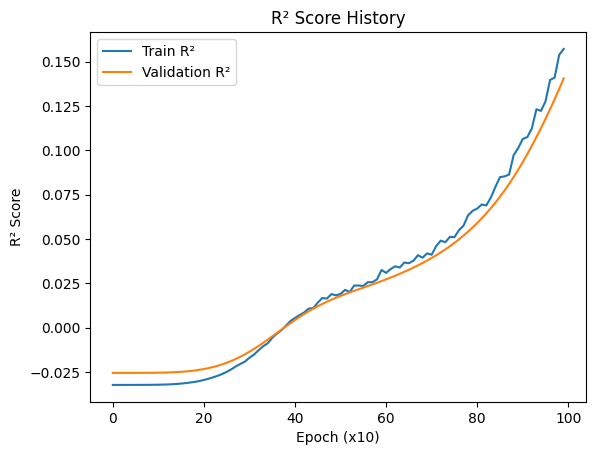

In [98]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.2)
        self.second_layer = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.third_layer = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.2)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self,x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.dropout(out)
        out = self.relu(self.second_layer(out))
        out = self.dropout(out)
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            # Training R²
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)

            # Validation predictions
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()  # Final evaluation after training
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T12 = time.perf_counter() - start_time
print('model time in seconds: ', T12)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()

Epoch [10/1000], Loss: 572601860096.0000, Train R²: -0.0324, Val R²: -0.0255
Epoch [20/1000], Loss: 572559130624.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [30/1000], Loss: 572296855552.0000, Train R²: -0.0318, Val R²: -0.0250
Epoch [40/1000], Loss: 571263877120.0000, Train R²: -0.0299, Val R²: -0.0235
Epoch [50/1000], Loss: 568349753344.0000, Train R²: -0.0247, Val R²: -0.0191
Epoch [60/1000], Loss: 562132484096.0000, Train R²: -0.0135, Val R²: -0.0097
Epoch [70/1000], Loss: 552226783232.0000, Train R²: 0.0044, Val R²: 0.0046
Epoch [80/1000], Loss: 545563836416.0000, Train R²: 0.0164, Val R²: 0.0167
Epoch [90/1000], Loss: 541859348480.0000, Train R²: 0.0231, Val R²: 0.0232
Epoch [100/1000], Loss: 538140409856.0000, Train R²: 0.0298, Val R²: 0.0298
Epoch [110/1000], Loss: 531876052992.0000, Train R²: 0.0411, Val R²: 0.0388
Epoch [120/1000], Loss: 520873279488.0000, Train R²: 0.0609, Val R²: 0.0536
Epoch [130/1000], Loss: 507423948800.0000, Train R²: 0.0852, Val R²: 0.0769
Epoch [14

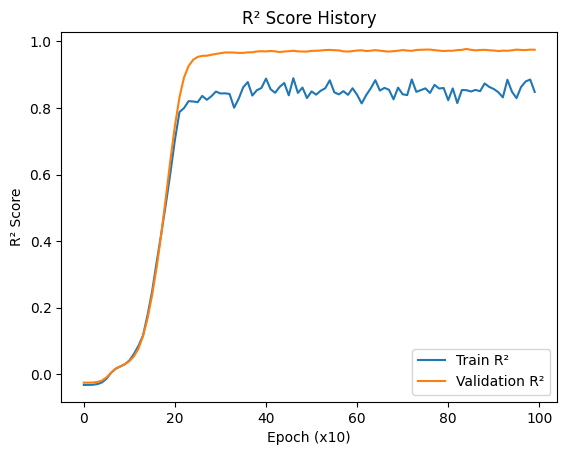

In [99]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 128)
        self.dropout = nn.Dropout(0.2)
        self.second_layer = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.third_layer = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.2)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self,x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.dropout(out)
        out = self.relu(self.second_layer(out))
        out = self.dropout(out)
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # This calculates R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T13 = time.perf_counter() - start_time
print('model time in seconds: ', T13)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()

Epoch [10/1000], Loss: 572571516928.0000, Train R²: -0.0323, Val R²: -0.0255
Epoch [20/1000], Loss: 571546861568.0000, Train R²: -0.0305, Val R²: -0.0237
Epoch [30/1000], Loss: 562004754432.0000, Train R²: -0.0133, Val R²: -0.0084
Epoch [40/1000], Loss: 547321348096.0000, Train R²: 0.0132, Val R²: 0.0155
Epoch [50/1000], Loss: 538884177920.0000, Train R²: 0.0284, Val R²: 0.0267
Epoch [60/1000], Loss: 521780494336.0000, Train R²: 0.0593, Val R²: 0.0562
Epoch [70/1000], Loss: 478617108480.0000, Train R²: 0.1371, Val R²: 0.1314
Epoch [80/1000], Loss: 370554142720.0000, Train R²: 0.3319, Val R²: 0.3360
Epoch [90/1000], Loss: 232953151488.0000, Train R²: 0.5800, Val R²: 0.6760
Epoch [100/1000], Loss: 139687755776.0000, Train R²: 0.7482, Val R²: 0.8882
Epoch [110/1000], Loss: 124882870272.0000, Train R²: 0.7748, Val R²: 0.9364
Epoch [120/1000], Loss: 89879568384.0000, Train R²: 0.8380, Val R²: 0.9490
Epoch [130/1000], Loss: 100462288896.0000, Train R²: 0.8189, Val R²: 0.9579
Epoch [140/1000]

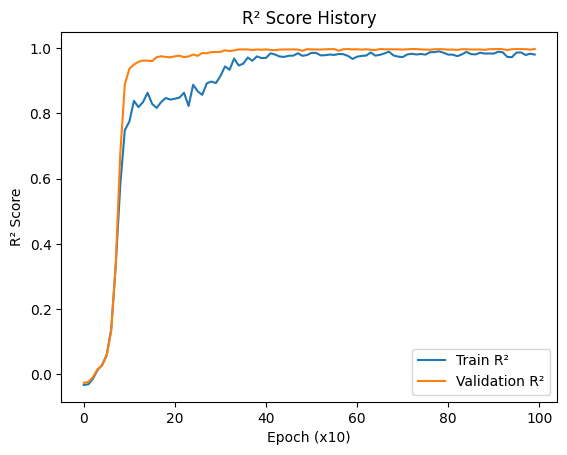

In [100]:
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedforwardNN, self).__init__()
        self.first_hidden_layer = nn.Linear(input_dim, 256)
        self.dropout = nn.Dropout(0.2)
        self.new_layer = nn.Linear(256, 128)
        self.dropout = nn.Dropout(0.2)
        self.second_layer = nn.Linear(128, 64)
        self.dropout = nn.Dropout(0.2)
        self.third_layer = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.2)
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self,x):
        out = self.relu(self.first_hidden_layer(x))
        out = self.dropout(out)
        out = self.relu(self.new_layer(out))
        out = self.dropout(out)
        out = self.relu(self.second_layer(out))
        out = self.dropout(out)
        out = self.relu(self.third_layer(out))
        return self.output_layer(out)

input_dim = X_train_tensor.shape[1]
model = FeedforwardNN(input_dim)

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Training loop
epochs = 1000
start_time = time.perf_counter()

train_r2_history = []
val_r2_history = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # This calculates R² for training and validation sets every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            train_r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())
            train_r2_history.append(train_r2)
            y_val_pred = model(X_test_tensor)
            val_r2 = r2_score(y_test_tensor.numpy(), y_val_pred.numpy())
            val_r2_history.append(val_r2)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Train R²: {train_r2:.4f}, Val R²: {val_r2:.4f}")

model.eval()
with torch.no_grad():
    y_pred_fnn_model = model(X_test_tensor).numpy()

fnn_model_mse = mean_squared_error(y_test, y_pred_fnn_model)
fnn_model_rmse = np.sqrt(fnn_model_mse)
fnn_model_r2 = r2_score(y_test, y_pred_fnn_model)
print("\nFinal Model Metrics:")
print("fnn_model MSE: ", fnn_model_mse)
print("fnn_model RMSE: ", fnn_model_rmse)
print("fnn_model R²: ", fnn_model_r2)
T14 = time.perf_counter() - start_time
print('model time in seconds: ', T14)

plt.plot(train_r2_history, label="Train R²")
plt.plot(val_r2_history, label="Validation R²")
plt.xlabel("Epoch (x10)")
plt.ylabel("R² Score")
plt.legend()
plt.title("R² Score History")
plt.show()

In [ ]:
import matplotlib.pyplot as plt


model_names = ["LR", "LS-1", "LS-2", "RF-1", "RF-2", "RF-3", "XGB-1" "XGB-2", "FNN-1", "FNN-2", "FNN-3", "FNN4", "FNN-5", "FNN-6"]
r2_scores = []  # R² scores
model_times = [T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T12, T13, T14]  # Corresponding times in seconds

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(model_times, r2_scores, color="blue", s=100, label="Models")

# Annotate each point with the model name
for i, model_name in enumerate(model_names):
    plt.text(model_times[i], r2_scores[i], model_name, fontsize=9, ha="right", va="bottom")

# Add labels and title
plt.xlabel("Model Time (seconds)", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("R² vs. Model Time", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Add a legend
plt.legend(["Model Points"], loc="lower right")

# Show the plot
plt.show()
